In [1]:
import sys
import os

# 获取当前 notebook 的目录
current_dir = os.getcwd()

# 获取项目根目录 (假设 notebook 在 notebooks/ 下，根目录就是上一级)
# 如果你的 notebook 在 notebooks/experiment_1/ 这种二级目录下，可能需要 ".." 两次
project_root = os.path.abspath(os.path.join(current_dir, ".."))

# 将根目录加入 python 路径
if project_root not in sys.path:
    sys.path.append(project_root)

# 一、数据清洗

## (一)导入合并数据并检查

In [2]:
from src.data import load_and_check

In [3]:
df_raw = load_and_check.load_raw_data()

共发现 2 个 JSON 文件，准备开始加载...
[1/2] 正在读取: articles1.json
[2/2] 正在读取: articles2.json
合并完成，共 1232 条新闻。


In [4]:
load_and_check.check_data(df_raw)

数据总行数: 1232
完美！没有发现缺失值。


,Total,Percent (%),Type


## (二)基础清洗

In [5]:
from src.data import data_clean

In [6]:
df_after_basic_clean = data_clean.basic_clean(df_raw)

--------------------------------------------------
正在规范化时间格式
转换前的pub_time示例: 2025/12/07
转换后的publish_date示例: 2025-12-07 00:00:00
正在删除不需要数据列
剩余列名如下: ['id', 'headline', 'source', 'content', 'publish_date']
正在重命名列
重命名后列名如下: ['id', 'title', 'source_media', 'content', 'publish_date']
正在去除重复数据，去除前数据量为: 1232
共去除重复数据: 26 去除后数据量为: 1206
--------------------------------------------------


## (三)处理媒体来源

In [7]:
df_after_media_clean = data_clean.meida_clean(df_after_basic_clean)

--------------------------------------------------
【开始媒体清洗流程】
原始数据总量: 1206 条
原始媒体分布已保存至: tables/源数据媒体来源分布.csv

--- 正在执行黑名单过滤 ---
黑名单关键词: ['The Tribune-Democrat']
 -> 剔除包含 'The Tribune-Democrat' 的数据: 2 条
黑名单清洗后剩余: 1204 条 (共移除 2 条)

--- 正在进行媒体来源合并与标准化 ---
合并后媒体分布已保存至: tables/清洗后媒体来源分布.csv
--------------------------------------------------


In [8]:
from src.visualization import media_visualization

完成可视化设置，当前系统: Linux，字体配置优先顺序: Noto Serif CJK SC
正在生成合并筛选后媒体来源分布图


/home/terrariver/projects/Public-Opinion-Monitoring/src/visualization/media_visualization.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


媒体来源分布图已保存至: /home/terrariver/projects/Public-Opinion-Monitoring/results/figures/媒体来源分布图.png
--------------------------------------------------


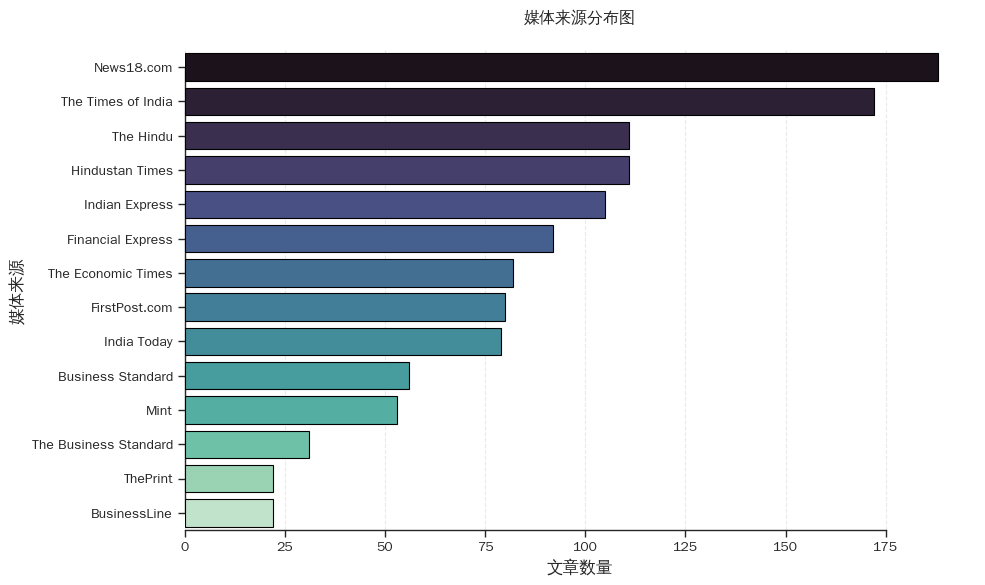

In [9]:
media_visualization.media_visualization(df_after_media_clean)

## (四)数据存储

In [10]:
data_clean.data_save(df_after_media_clean)

清洗完成后数据总条数为1204
正在保存最终清洗数据到: /home/terrariver/projects/Public-Opinion-Monitoring/data/processed
数据保存完成。


# 二、大模型解析

## (一)利用大模型进行分类

In [11]:
# 加载清洗后的数据
df_clean = load_and_check.load_clean_data()
# 测试
from src import config
df_clean = df_clean.head(30)
df_clean.to_csv(config.PROCESSED_DATA_DIR / 'cleaned_data.csv', index=False)

In [12]:
from src.llm import llm_classify

In [13]:
llm_classify.llm_classify_concurrently(df_clean)

📊 总行数: 30
🔄 本次需处理: 30 行
✅ 已完成: 0 行

⚙️ 并发配置:
  - 线程数: 10
  - 每条重试: 5 次
  - 自动保存间隔: 每 15 条

🚀 开始并发处理...



🔥 LLM Processing:   0%|          | 0/30 [00:00<?, ?it/s]

⚠️ 429 限流, 等待 5s...
⚠️ 429 限流, 等待 5s...
⚠️ 429 限流, 等待 5s...
⚠️ 429 限流, 等待 5s...
⚠️ 429 限流, 等待 5s...
⚠️ 429 限流, 等待 5s...
⚠️ 429 限流, 等待 5s...
⚠️ 429 限流, 等待 5s...
⚠️ 429 限流, 等待 5s...
⚠️ 429 限流, 等待 5s...
⚠️ 429 限流, 等待 10s...
⚠️ 429 限流, 等待 10s...
⚠️ 429 限流, 等待 10s...
⚠️ 429 限流, 等待 10s...
⚠️ 429 限流, 等待 10s...
⚠️ 429 限流, 等待 10s...
⚠️ 429 限流, 等待 10s...
⚠️ 429 限流, 等待 10s...
⚠️ 429 限流, 等待 10s...
⚠️ 429 限流, 等待 10s...


🔥 LLM Processing:  10%|█         | 3/30 [00:36<04:08,  9.22s/it]

⚠️ 429 限流, 等待 15s...
⚠️ 429 限流, 等待 15s...
⚠️ 429 限流, 等待 15s...
⚠️ 429 限流, 等待 5s...
⚠️ 429 限流, 等待 15s...
⚠️ 429 限流, 等待 15s...
⚠️ 429 限流, 等待 15s...
⚠️ 429 限流, 等待 5s...
⚠️ 429 限流, 等待 15s...
⚠️ 429 限流, 等待 5s...
⚠️ 429 限流, 等待 10s...
⚠️ 429 限流, 等待 10s...
⚠️ 429 限流, 等待 20s...
⚠️ 429 限流, 等待 20s...
⚠️ 429 限流, 等待 10s...
⚠️ 429 限流, 等待 20s...
⚠️ 429 限流, 等待 20s...
⚠️ 429 限流, 等待 20s...
⚠️ 429 限流, 等待 20s...
⚠️ 429 限流, 等待 15s...
⚠️ 429 限流, 等待 20s...


🔥 LLM Processing:  17%|█▋        | 5/30 [01:16<05:44, 13.76s/it]

⚠️ 429 限流, 等待 5s...


🔥 LLM Processing:  43%|████▎     | 13/30 [01:34<00:37,  2.20s/it]

⚠️ 429 限流, 等待 25s...
⚠️ 429 限流, 等待 25s...


🔥 LLM Processing:  47%|████▋     | 14/30 [01:36<00:34,  2.18s/it]


💾 已保存进度: 15/30 (0.16 条/秒)
⚠️ 429 限流, 等待 5s...
⚠️ 429 限流, 等待 20s...
⚠️ 429 限流, 等待 5s...
⚠️ 429 限流, 等待 25s...
⚠️ 429 限流, 等待 5s...
⚠️ 429 限流, 等待 5s...
⚠️ 429 限流, 等待 5s...
⚠️ 429 限流, 等待 5s...
⚠️ 429 限流, 等待 10s...
⚠️ 429 限流, 等待 10s...
⚠️ 429 限流, 等待 10s...
⚠️ 429 限流, 等待 10s...


🔥 LLM Processing:  60%|██████    | 18/30 [02:02<00:49,  4.10s/it]

⚠️ 429 限流, 等待 10s...
⚠️ 429 限流, 等待 10s...


🔥 LLM Processing:  63%|██████▎   | 19/30 [02:05<00:44,  4.04s/it]

⚠️ 429 限流, 等待 5s...
⚠️ 429 限流, 等待 5s...
⚠️ 429 限流, 等待 5s...
⚠️ 429 限流, 等待 5s...
⚠️ 429 限流, 等待 15s...
⚠️ 429 限流, 等待 15s...


🔥 LLM Processing:  70%|███████   | 21/30 [02:17<00:39,  4.34s/it]

⚠️ 429 限流, 等待 15s...


🔥 LLM Processing:  83%|████████▎ | 25/30 [02:26<00:12,  2.50s/it]

⚠️ 429 限流, 等待 10s...


🔥 LLM Processing:  93%|█████████▎| 28/30 [02:37<00:06,  3.15s/it]

⚠️ 429 限流, 等待 20s...
⚠️ 429 限流, 等待 15s...
⚠️ 429 限流, 等待 20s...
⚠️ 429 限流, 等待 25s...


🔥 LLM Processing:  97%|█████████▋| 29/30 [03:41<00:21, 21.05s/it]

⚠️ 429 限流, 等待 25s...


🔥 LLM Processing: 100%|██████████| 30/30 [04:09<00:00,  8.32s/it]


💾 已保存进度: 30/30 (0.12 条/秒)

✅ 最终保存成功!

✅ 处理完成!
📈 性能统计:
  - 总耗时: 249.66 秒
  - 平均速度: 0.12 条/秒
  - 处理总数: 30 条

⚠️ 仍有 5 条未归入合法分类
   建议: 重新运行此函数



,id,title,source_media,content,publish_date,category,reason
0,NIEXPR0020251207elc70004c,Tariff-hit INR losing currency against others,Indian Express,New Delhi The Indian rupee has breached the ps...,2025-12-07,Error,Failed after 5 retries
1,NIEXPR0020251207elc700056,The science behind TG’s Vision document,Indian Express,Hyderabad It’s easy to forecast forward in tim...,2025-12-07,Error,Failed after 5 retries
2,NIEXPR0020251207elc70006r,Locked in Legacy,Indian Express,Mohammad Khalil remembers the first lock he ev...,2025-12-07,中印经贸与科技,文章核心在讲中国廉价锁具进口对印度阿里格尔传统锁业出口和生意的冲击，属中印经贸竞争。
3,NIEXPR0020251207elc700006,"PUTIN WANTS TO KEEP OIL, ARMS FLOWING",Indian Express,Narendra Modi’s red carpet welcome and signatu...,2025-12-07,中国外交,全文聚焦印度对俄关系及多边平衡外交，与中国或中印互动仅属背景暗示，不是核心议题。
4,NIEXPR0020251207elc70000r,"Water Metro rides the artsy tide, to start spl...",Indian Express,Kochi The Kochi Water Metro (KWML) is stepping...,2025-12-07,其他,文章主要讲述科钦水上地铁与艺术双年展及旅游服务安排，无涉中印地缘政治与双边议题。
5,NIEXPR0020251207elc70004z,A Poet Between Civilisations,Indian Express,The Western literary canon that seems an indes...,2025-12-07,其他,主要是文学书评与文化交流内容，无涉地缘政治或中印政策议题。
6,NIEXPR0020251207elc70005u,Cheer the Benevolent Eye in Your Pocket,Indian Express,"Rejoice, dear citizen, for the Indian governme...",2025-12-07,其他,讽刺印度国内监控与隐私问题，与中国或中印关系无关，属一般时评/文化评论。
7,HNTM000020251205elc6004v4,Keen to work with India for stability in Indo-...,Hindustan Times,"India, Dec. 6 -- The US intends to cooperate w...",2025-12-06,Error,Failed after 5 retries
8,NEWSET0020251207elc700007,"China rattled by Taiwan's T-Dome, Chinese airc...",News18.com,New Delhi. Due to China presenting its claims ...,2025-12-07,台湾问题,全文围绕台湾T-Dome防空系统及其应对大陆攻台，属台湾问题与台海局势。
9,NEWSET0020251207elc700005,"'Do not travel to Pakistan,' Britain issues tr...",News18.com,The continuously increasing terrorist activiti...,2025-12-07,其他,文章聚焦英国对巴基斯坦的旅行警告和恐怖威胁，与中印议题关联不强。


## (二)利用大模型进行总结与情感分析

In [14]:
df_after_classify = load_and_check.load_classify_data()

🧹 已自动剔除 21 条无效/错误分类数据 (剩余 9 条)


In [15]:
from src.llm import llm_summarize

In [16]:
llm_summarize.llm_summarize_concurrently(df_after_classify)

📊 总行数: 9
🔄 本次需处理: 9 行

🚀 开始并发处理 (Workers: 9)...



🔥 LLM Processing:   0%|          | 0/9 [00:00<?, ?it/s]

⚠️ 429 限流, 等待 5s...
⚠️ 429 限流, 等待 5s...
⚠️ 429 限流, 等待 5s...
⚠️ 429 限流, 等待 5s...
⚠️ 429 限流, 等待 5s...
⚠️ 429 限流, 等待 5s...
⚠️ 429 限流, 等待 5s...
⚠️ 429 限流, 等待 5s...
⚠️ 429 限流, 等待 5s...


🔥 LLM Processing:  11%|█         | 1/9 [00:18<02:31, 18.98s/it]

⚠️ 429 限流, 等待 10s...
⚠️ 429 限流, 等待 10s...
⚠️ 429 限流, 等待 10s...


🔥 LLM Processing:  56%|█████▌    | 5/9 [00:20<00:11,  3.00s/it]

⚠️ 429 限流, 等待 10s...
⚠️ 429 限流, 等待 15s...
⚠️ 429 限流, 等待 15s...
⚠️ 429 限流, 等待 15s...
⚠️ 429 限流, 等待 15s...
⚠️ 429 限流, 等待 20s...
⚠️ 429 限流, 等待 20s...
⚠️ 429 限流, 等待 20s...
⚠️ 429 限流, 等待 20s...


🔥 LLM Processing:  67%|██████▋   | 6/9 [01:27<01:03, 21.21s/it]

⚠️ 429 限流, 等待 25s...


🔥 LLM Processing:  78%|███████▊  | 7/9 [01:34<00:33, 17.00s/it]

⚠️ 429 限流, 等待 25s...


🔥 LLM Processing: 100%|██████████| 9/9 [02:01<00:00, 13.54s/it]


✅ 处理完成! 错误数: 2
